In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import sys

sys.path.append('/home/guangda/repos/labelmaker-mix3d')

from mix3d.datasets.scannet200.scannet200_constants import VALID_CLASS_IDS_200, CLASS_LABELS_200, SCANNET_COLOR_MAP_200
from data.raw.scannet.ScanNet.BenchmarkScripts.ScanNet200.scannet200_splits import HEAD_CATS_SCANNET_200, COMMON_CATS_SCANNET_200, TAIL_CATS_SCANNET_200

In [3]:
paths = {
    "baseline": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_mink_baseline.json",
    "ALC+ScanNet200 joint (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_mink_alc_scannet_joint.json",
    "ALS200 pretrain+ft (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_mink_alc_pretrain_ft.json"
}

In [4]:
import json
data = {}
for key in paths.keys():
    with open(paths[key]) as f:
        data_item = json.load(f)
    data[key] = data_item

In [5]:
trials = paths.keys()

In [6]:
for _, item in data.items():
    print(len(item.keys()))
    for key in item.keys():
        if key not in CLASS_LABELS_200:
            print(key)

201
mIoU
201
mIoU
201
mIoU


In [7]:
cmap = plt.get_cmap('tab20')

[0.52302822 0.22495413 0.13184302]
[0.5506377 0.2470587 0.1236121]
[0.53916315 0.24168402 0.12456859]


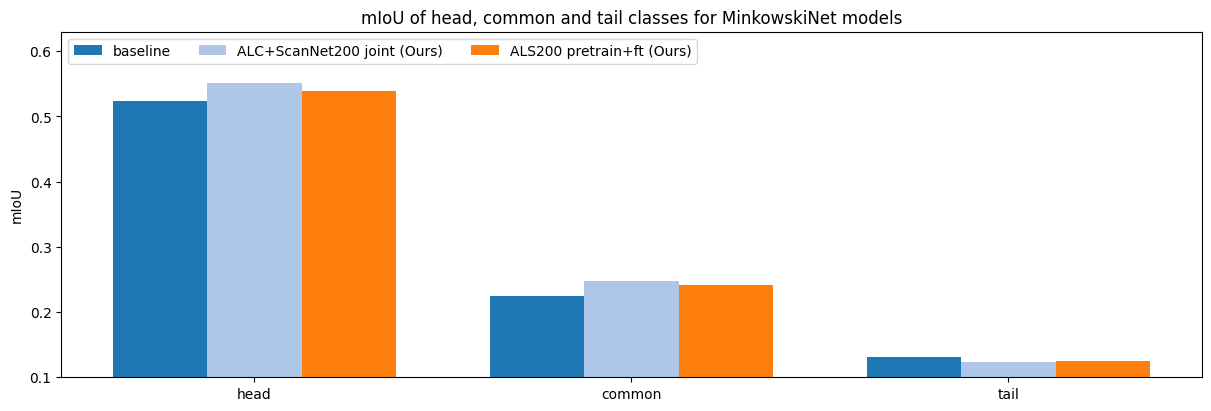

In [8]:
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

axis_labels = ["head", "common", "tail"]

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for i, (trial, data_item) in enumerate(data.items()):
    offset = width * multiplier
    color = cmap(i)

    head_mIoU = np.nan_to_num(np.array([data_item[name] for name in HEAD_CATS_SCANNET_200])).mean()
    common_mIoU = np.nan_to_num(np.array([data_item[name] for name in COMMON_CATS_SCANNET_200])).mean()
    tail_mIoU = np.nan_to_num(np.array([data_item[name] for name in TAIL_CATS_SCANNET_200])).mean()

    data_arr = np.array([head_mIoU, common_mIoU, tail_mIoU])
    print(data_arr)
    rects = ax.bar(x + offset, data_arr, width, label=trial, color=color)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # if trial == "PPT":
    #     multiplier += 1
        
# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mIoU')
ax.set_title('mIoU of head, common and tail classes for MinkowskiNet models')
# ax.set_xticks(x + width, axis_labels, rotation=45)
ax.set_xticks(x + width, axis_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.1, 0.63)
# ax.set_xlim(0, 5)

plt.savefig("ScanNet200_comparison_mink.pdf")
plt.show()

In [9]:
# selected class plot
selected_classes = ["pillow", "dresser", "bench", "mirror", "oven", "clothes dryer", "bulletin board", "fireplace", "doorframe", "shower head"]

[0.51493604 0.49056889 0.19730282 0.40272259 0.         0.72621479
 0.07783646 0.41418735 0.413166   0.21018698]
[0.56386083 0.56860899 0.35571783 0.4540705  0.15488045 0.78816372
 0.49830984 0.70034976 0.5025425  0.33010961]
[0.58492913 0.60093868 0.37560961 0.4595575  0.15733136 0.82812188
 0.17278367 0.5740323  0.48358537 0.30689877]


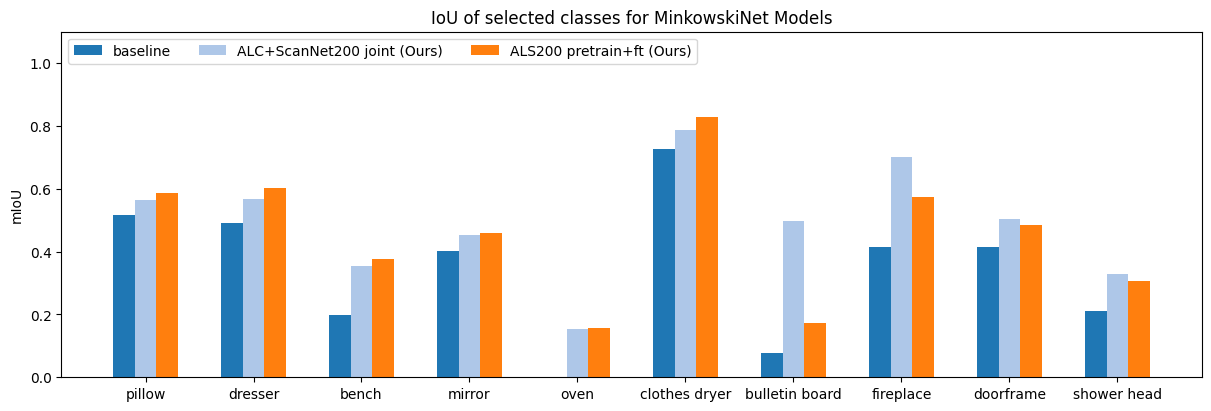

In [10]:
x = np.arange(10)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

axis_labels = selected_classes

fig, ax = plt.subplots(layout="constrained", figsize=(12, 4))

for i, (trial, data_item) in enumerate(data.items()):
    offset = width * multiplier
    color = cmap(i)

    data_arr = np.array([data_item[name] for name in selected_classes])
    print(data_arr)
    rects = ax.bar(x + offset, data_arr, width, label=trial, color=color)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # if trial == "PPT":
    #     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("mIoU")
ax.set_title("IoU of selected classes for MinkowskiNet Models")
# ax.set_xticks(x + width, axis_labels, rotation=45)
ax.set_xticks(x + width, axis_labels)
ax.legend(loc="upper left", ncols=4)
ax.set_ylim(0.0, 1.1)
# ax.set_xlim(0, 5)

plt.savefig("ScanNet200_mink_selected_class.pdf")
plt.show()

In [11]:
paths = {
    "baseline": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_ptv3.json",
    "ALC+ScanNet200 joint (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_ptv3_alc_scannet_joint.json",
    "PPT with ALC (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_ptv3_ppt_with_alc.json",
    "ALS200 pretrain+ft (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet200_ptv3_alc_pretrain.json"
}

In [12]:
import json
data = {}
for key in paths.keys():
    with open(paths[key]) as f:
        data_item = json.load(f)
    data[key] = data_item

In [13]:
for _, item in data.items():
    print(len(item.keys()))
    for key in item.keys():
        if key not in CLASS_LABELS_200:
            print(key)

200
201
mIoU
201
mIoU
201
mIoU


[0.56475455 0.30112059 0.19336212]
[0.60071652 0.31357315 0.16381721]
[0.60547772 0.31631775 0.22509002]
[0.58618875 0.32960951 0.23798294]


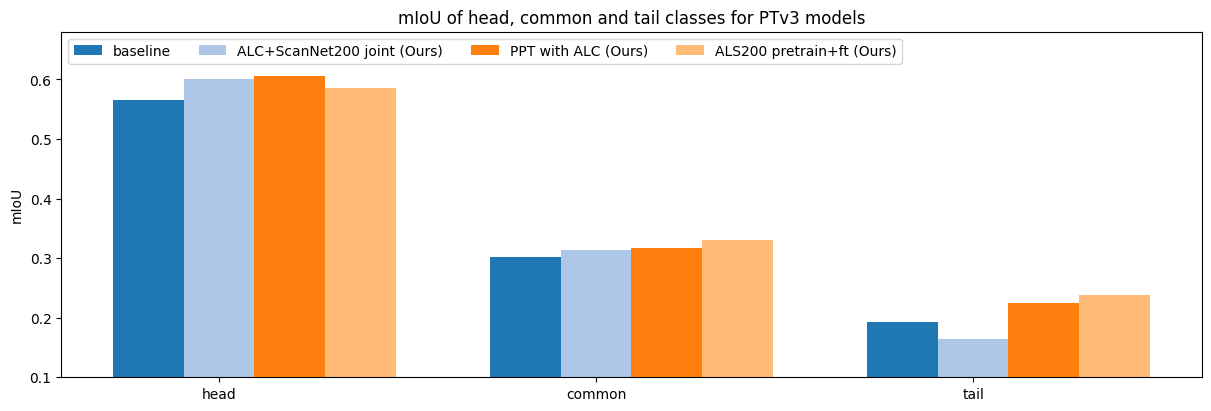

In [14]:
x = np.arange(3)  # the label locations
width = 0.75/4  # the width of the bars
multiplier = 0

axis_labels = ["head", "common", "tail"]

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for i, (trial, data_item) in enumerate(data.items()):
    offset = width * multiplier
    color = cmap(i)

    head_mIoU = np.nan_to_num(np.array([data_item[name] for name in HEAD_CATS_SCANNET_200])).mean()
    common_mIoU = np.nan_to_num(np.array([data_item[name] for name in COMMON_CATS_SCANNET_200])).mean()
    tail_mIoU = np.nan_to_num(np.array([data_item[name] for name in TAIL_CATS_SCANNET_200])).mean()

    data_arr = np.array([head_mIoU, common_mIoU, tail_mIoU])
    print(data_arr)
    rects = ax.bar(x + offset, data_arr, width, label=trial, color=color)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # if trial == "PPT":
    #     multiplier += 1
        
# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mIoU')
# ax.set_title('Penguin attributes by species')
ax.set_title('mIoU of head, common and tail classes for PTv3 models')
# ax.set_xticks(x + width, axis_labels, rotation=45)
ax.set_xticks(x + width, axis_labels)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0.1, 0.68)
# ax.set_xlim(0, 5)

plt.savefig("ScanNet200_comparison_PTv3.pdf")
plt.show()

[0.6296 0.4792 0.4553 0.5008 0.0012 0.3614 0.3545 0.5901 0.4693 0.2105]
[0.69722846 0.65628671 0.56982147 0.61846372 0.25381208 0.70269214
 0.45261812 0.71260853 0.55868143 0.33102253]
[0.67505771 0.58168155 0.55674882 0.58299928 0.19425587 0.79182526
 0.69002651 0.6555906  0.54023255 0.26305609]


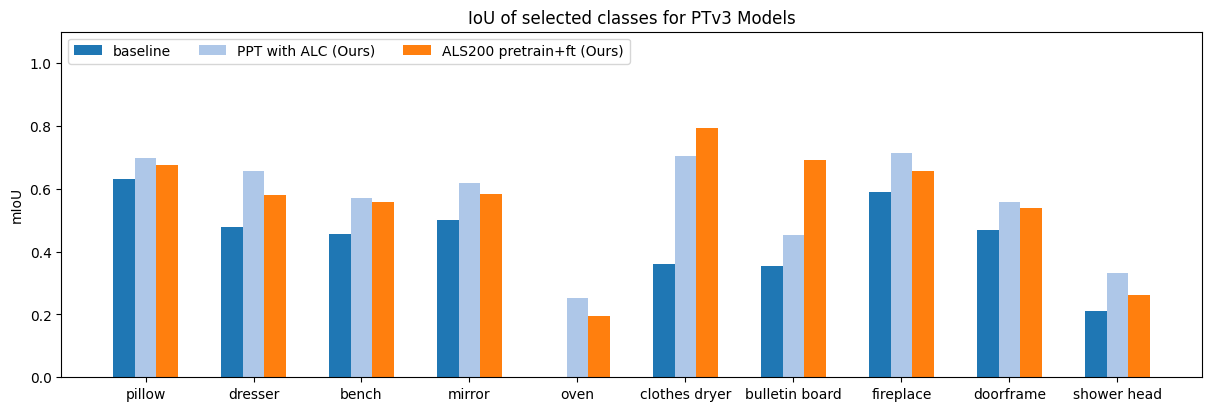

In [15]:
x = np.arange(10)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

axis_labels = selected_classes

fig, ax = plt.subplots(layout="constrained", figsize=(12, 4))

data.pop("ALC+ScanNet200 joint (Ours)")

for i, (trial, data_item) in enumerate(data.items()):
    offset = width * multiplier
    color = cmap(i)

    data_arr = np.array([data_item[name] for name in selected_classes])
    print(data_arr)
    rects = ax.bar(x + offset, data_arr, width, label=trial, color=color)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # if trial == "PPT":
    #     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("mIoU")
# ax.set_title("Penguin attributes by species")
ax.set_title("IoU of selected classes for PTv3 Models")
# ax.set_xticks(x + width, axis_labels, rotation=45)
ax.set_xticks(x + width, axis_labels)
ax.legend(loc="upper left", ncols=4)
ax.set_ylim(0.0, 1.1)
# ax.set_xlim(0, 5)

plt.savefig("ScanNet200_ptv3_selected_class.pdf")
plt.show()